# Notebook de preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Ressources

* https://github.com/lfsimoes/mars_express__esn (contient la liste des gits des meilleurs team)
* https://kelvins.esa.int/mars-express-power-challenge/data/ (à lire !!)

In [2]:
FOLDER = "data/train_set/"
FEATURES = ['dmop', 'saaf', 'ftl', 'evtf', 'ltdata']
N_VAL = 500
YEAR = 2012

**Solar aspect angles (SAAF):**

* solar angles: sa, sx, sy, sz
* cosines of solar angles
* density, i.e. number of measurements in 1s intervals

**Events Files (EVTF):**

* indicators for occultation and penumbra/umbra events
* indicator for current nadir pointing direction (N-to-S or S-to-N)
* indicator for current Earth pointing direction (N-to-S or S-to-N)
* MEX's current/last position above Mars reference ellipsoid
* MEX's trajectory direction (ascend/descend) w.r.t. the Mars reference ellipsoid

**Flight Dynamics TimeLine (FTL):**

* indicators (one-hot encoding) of each event
* indicator of the communication device being used
 
**Detailed Mission Operations Plan (DMOP):**

* indicator (one-hot encoding) of each command for each subsystem (i.e. last triggered command)
* amount of command changes in the last hour for each subsystem

**Long-term data (LTDATA):**

* as is

In [4]:
## Query regex unix
query_all = f"{FOLDER}*" # regex: tout ce qui commence par "FOLDER"

file_name_list = glob.glob(query_all) 
# execute un "ls" sur le query passé en argument, donc retourne tous 
# les fichiers contenus dans le dossier "FOLDER" isi
file_name_list

['data/train_set/context--2012-05-27_2014-04-14--dmop.csv',
 'data/train_set/context--2012-05-27_2014-04-14--saaf.csv',
 'data/train_set/power--2008-08-22_2010-07-10.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ftl.csv',
 'data/train_set/context--2012-05-27_2014-04-14--evtf.csv',
 'data/train_set/power--2010-07-10_2012-05-27.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ftl.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ftl.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ltdata.csv',
 'data/train_set/context--2010-07-10_2012-05-27--evtf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--dmop.csv',
 'data/train_set/power--2012-05-27_2014-04-14.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--saaf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--evtf.csv',
 'data/train_set/context--2010-07-10_2012-05-27--saaf.csv',
 

In [22]:
def plot_all_columns_of_df(data, n_val):
    """
    Gather all columns of a dataframe, plot them stacked up to 
    the n_val value (if not the computer crashes because of RAM usage)
    """
    group = list(data.columns)
    fig, ax = plt.subplots(len(group), 1, figsize=(15,1.5 * len(group)))
    k = 0
    for col in group:
        ax[k].plot(data[col][:n_val])
        ax[k].set_title(col,y=0.5,loc="right")
        k+=1
    plt.show()

def selection(folder = FOLDER, search = "*", first = False):
    """
    Return a list of file in a folder following a search query. Return the name of the user selected file.
    If first, output the first result of the query
    """
    query_list = glob.glob(f"{folder}*{search}*")
    query_list_formated = [s.split(folder)[1] for s in query_list]
    query_list_formated_numbered  = [f'{i} - {query_list_formated[i]}' for i in range(len(query_list_formated))]
    if not first :
        for c in query_list_formated_numbered:
            print(c)
        cin = input("Selection : ")
        print(query_list_formated_numbered[int(cin)])
        return query_list[int(cin)]
    else: 
        return query_list[0]

### Plot des 500 premières valeurs de toutes les colonnes du dataframe, sans traitement, pour chaque dataframe de variables quantitatives

In [5]:
def analyse_brute():
    """
    User select a file from a file list, import the file and plot column values
    up to N_VAL
    """
    file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
    data = pd.read_csv(file_name, sep=",", index_col=0)
    plot_group(data, N_VAL)

### POWER

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  3


3 - power--2010-07-10_2012-05-27.csv


/home/yamsok/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


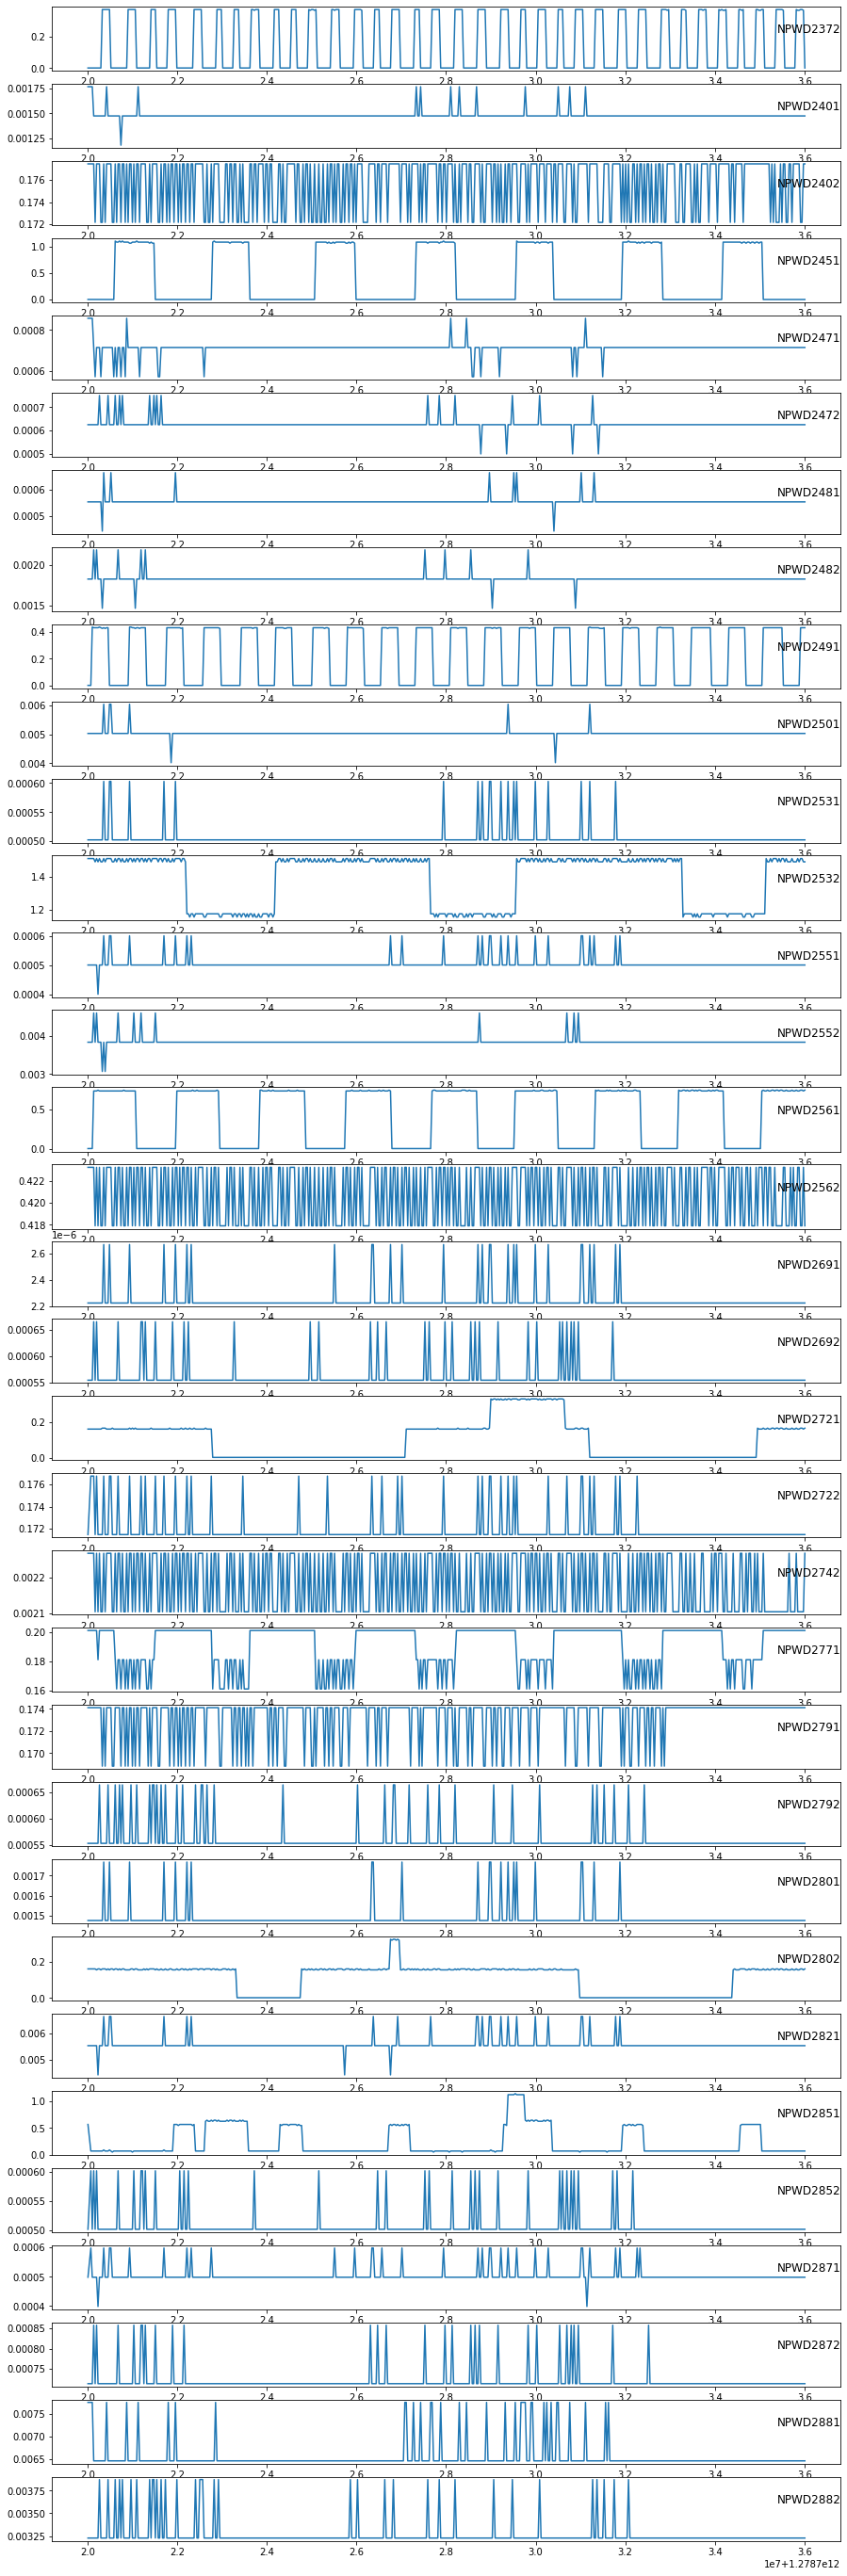

In [34]:
analyse_brute()

In [35]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  4


4 - context--2012-05-27_2014-04-14--ftl.csv


,ute_ms,type,flagcomms
utb_ms,,,
1338078562000,1338080362000,SLEW,False
1338080362000,1338083482000,EARTH,True
1338083482000,1338085282000,SLEW,False
1338085282000,1338086202000,INERTIAL,False
1338086202000,1338087712000,SLEW,False
...,...,...,...
1397410691000,1397411591000,EARTH,False
1397411591000,1397413391000,SLEW,False
1397413391000,1397421159000,WARMUP,False


In [6]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  3


3 - power--2010-07-10_2012-05-27.csv


/home/yamsok/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1278720008577,0.001821,0.001769,0.177440,0.006019,0.000857,0.000626,0.000554,0.001827,0.002419,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.568060,0.000501,0.000499,0.000714,0.007748,0.003227
1278720072577,0.001821,0.001769,0.177440,0.006019,0.000857,0.000626,0.000554,0.001827,0.002016,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000602,0.000598,0.000714,0.007748,0.003227
1278720104559,0.001821,0.001769,0.177440,0.006019,0.000857,0.000626,0.000554,0.001827,0.435523,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000501,0.000499,0.000714,0.007748,0.003227
1278720136566,0.002185,0.001474,0.177440,0.005015,0.000714,0.000626,0.000554,0.002192,0.430256,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000602,0.000499,0.000857,0.006457,0.003227
1278720168562,0.001821,0.001474,0.172173,0.005015,0.000571,0.000626,0.000554,0.001827,0.430256,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338076649753,0.001821,0.001474,0.177440,0.005015,0.000714,0.006247,0.000554,0.001827,0.002016,0.005028,...,0.000996,0.001769,0.161594,0.006657,0.647788,0.000501,0.000598,0.000714,0.006457,0.003227
1338076681758,0.001821,0.001474,0.177440,0.005015,0.000714,0.001001,0.000554,0.001827,0.002016,0.006033,...,0.000996,0.001769,0.161594,0.006657,0.647788,0.000501,0.000598,0.000714,0.006457,0.003227
1338076713753,0.001821,0.001474,0.172173,0.005015,0.000714,0.001001,0.000554,0.001827,0.002016,0.005028,...,0.000996,0.001474,0.156296,0.005547,0.627856,0.000501,0.000499,0.000714,0.006457,0.003227


## Tentative d'interpolation pour caler ltdata sur le sampling rate de saaf

In [8]:
## import de la première année d'une classe de variables quantitative (saaf, ltdata)
def import_quantitative_df(file_name, folder = FOLDER):
    query = f"*{folder}*{file_name}*"
    file_name_list = glob.glob(query) 
    file_name_first = np.sort(file_name_list)[0]
    print(file_name_first, "imported.")
    data = pd.read_csv(file_name_first, sep=",", index_col=0)
    data['date'] = data.index
    data = data.reset_index(drop=True) 
    # for file_name in file_name_list_sorted:
    #     print(file_name)
    #     data = pd.read_csv(file_name, sep=",", index_col=0)
    #     saaf_data.append(data)
    # saaf = pd.concat(saaf_data)
    return data

def import_power_col(col = "NPWD2451", folder = FOLDER):
    query_power = f"*{FOLDER}*power*"
    file_name_list = glob.glob(query_power) 
    file_name = np.sort(file_name_list)[0] # ordonne selon l'année
    print(file_name, "imported.")
    data = pd.read_csv(file_name, sep=",", index_col=0, usecols = ["ut_ms", col])
    data['date'] = data.index
    data = data.reset_index(drop=True)    
    return data

In [9]:
saaf = import_quantitative_df("saaf")
ltdata = import_quantitative_df("ltdata")
power = import_power_col()

data/train_set/context--2008-08-22_2010-07-10--saaf.csv imported.
data/train_set/context--2008-08-22_2010-07-10--ltdata.csv imported.
data/train_set/power--2008-08-22_2010-07-10.csv imported.


In [10]:
# Copie des df puis concatenation 
# on trie par date -> ça intercale les mesures ltdata au milieu de celles de saaf
# on interpole tout ce qui manque (NaN) linéairement avec la méthode interpolate de pandas
# et PAF
def concatenate_and_interpolate_df(df_list):
    
    combined = pd.concat(df_list)
    combined = combined.sort_values("date").reset_index(drop=True)
    combined = combined.interpolate()
    combined["interval"] = pd.Series(combined["date"][1:].to_numpy() - combined["date"][:-1].to_numpy())
    combined.dropna()
    return combined


In [12]:
data = concatenate_and_interpolate_df([saaf, ltdata, power])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092098 entries, 0 to 3092097
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   sa                       float64
 1   sx                       float64
 2   sy                       float64
 3   sz                       float64
 4   date                     int64  
 5   sunmars_km               float64
 6   earthmars_km             float64
 7   sunmarsearthangle_deg    float64
 8   solarconstantmars        float64
 9   eclipseduration_min      float64
 10  occultationduration_min  float64
 11  NPWD2451                 float64
 12  interval                 float64
dtypes: float64(12), int64(1)
memory usage: 306.7 MB


In [18]:
def create_sampling_rate_vec(sec_interval, df):
    """
    Create a date (ut_ms format) vector piecewiese continuous during "sec_interval" seconds
    """
    timestep = sec_interval * 1000
    median_interval = df["interval"].median()
    nb_samples = len(df) 
    group_size = int(timestep // median_interval)
    nb_group = int(nb_samples // group_size)
    print(f"Sample groups : {nb_group}")
    vec = np.zeros(nb_samples)
    for i in range(nb_group):
        vec[group_size * i: group_size * (i + 1)] = [df["date"][i * group_size]] * group_size

    vec[group_size * nb_group : ] = [df["date"][ nb_group * group_size]] * len(vec[group_size * nb_group : ])
    return vec

In [23]:
def subsample_df(df, sampling_rate_sec = 3600):
    """
    Subsample all columns of df with a sampling rate in seconds
    """
    group_vector = create_sampling_rate_vec(sampling_rate_sec, df)
    df["groups"] = group_vector
    df.groupby(by="groups").mean()
    return df

In [24]:
data = subsample_df(data)

Sample groups : 16804


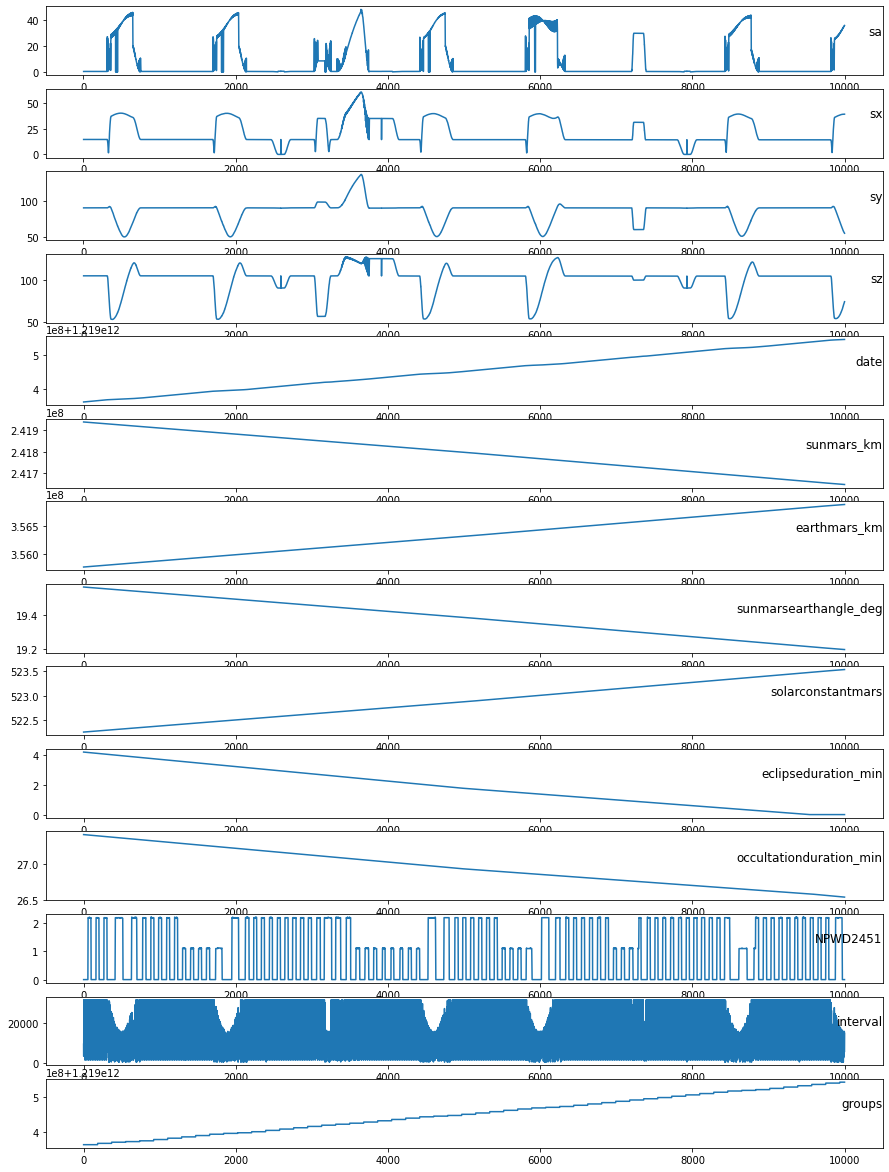

In [26]:
plot_all_columns_of_df(data, 10000)

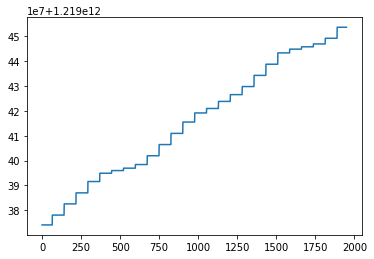

In [95]:
plt.plot(vec[5 * 78: 30*78])

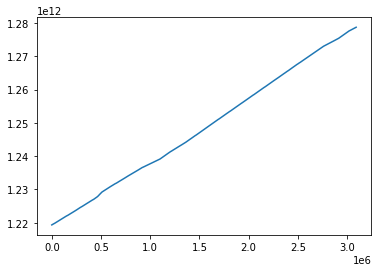

In [30]:
plt.plot(combined["date"])

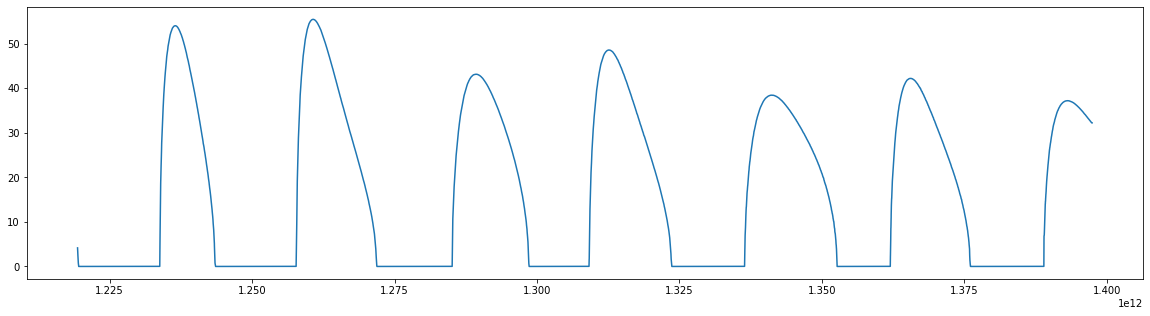

In [19]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(combined["date"], combined["eclipseduration_min"])
plt.show()

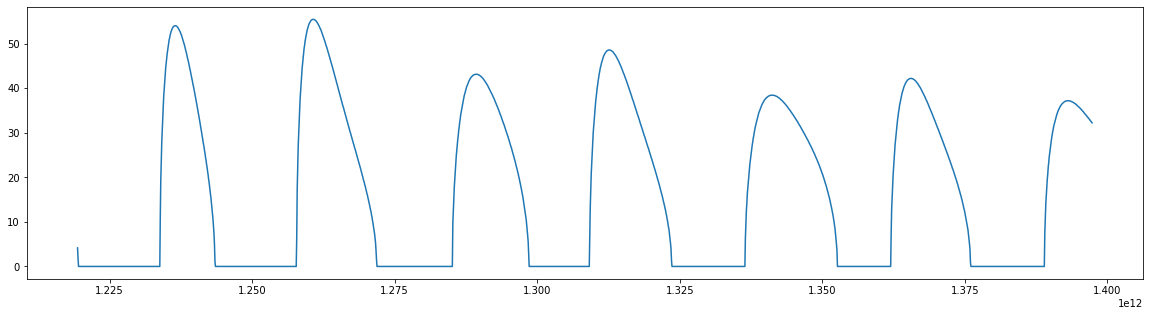

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(ltdata.index, ltdata["eclipseduration_min"])
plt.show()